In [50]:
#loading the data into the working space 'jupyter', looking after the features and checking the shape

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
#provide the folder name/filename.csv in the folder to read the data
data = pd.read_csv("insurance-premium-prediction/insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [52]:
x_data = data.drop('expenses', axis ='columns')
y_data = data['expenses']

In [53]:
x_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [54]:
y_data.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [55]:
print(x_data.info()) #checking the information of the x_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB
None


In [58]:
#the data contains 1338rows and 7coloumns
x_data.shape

(1338, 6)

In [59]:
y_data.shape #have a look on expenses column of the data

(1338,)

In [60]:
x_data_onehot = pd.get_dummies(x_data, columns=['sex', 'smoker', 'region'], prefix=['sex-encoding','smoker-encoding','region-encoding'])
x_data_onehot.head()

,age,bmi,children,sex-encoding_female,sex-encoding_male,smoker-encoding_no,smoker-encoding_yes,region-encoding_northeast,region-encoding_northwest,region-encoding_southeast,region-encoding_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0


In [61]:
from sklearn import preprocessing

#create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

#scale numerical_features
scaled_x_features = minmax_scale.fit_transform(x_data_onehot)

#show features
print(scaled_x_features)

[[0.02173913 0.32075472 0.         ... 0.         0.         1.        ]
 [0.         0.47978437 0.2        ... 0.         1.         0.        ]
 [0.2173913  0.45822102 0.6        ... 0.         1.         0.        ]
 ...
 [0.         0.56334232 0.         ... 0.         1.         0.        ]
 [0.06521739 0.26415094 0.         ... 0.         0.         1.        ]
 [0.93478261 0.35309973 0.         ... 1.         0.         0.        ]]


/usr/lib/python3/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [74]:
#Training set and testing set
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(scaled_x_features, y_data, test_size=0.33, random_state=42) 

In [75]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(896, 11)
(896,)
(442, 11)
(442,)


In [76]:
#set a model which is 'linear regression'
from sklearn import linear_model

lm = linear_model.LinearRegression()

#fit the model
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [77]:
print(model.score(X_test, y_test))

0.7603096573731459


In [85]:
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
print(RMSE)

5926.663415236362


Text(0, 0.5, 'predictions')

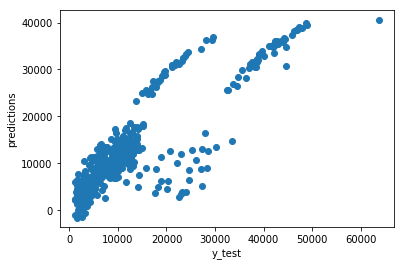

In [78]:
#plotting
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [79]:
d = {'Actual':y_test,'Predicted':predictions}
df = pd.DataFrame(data=d)
df.head(10)

,Actual,Predicted
764,9095.07,8960.0
887,5272.18,7168.0
890,29330.98,36352.0
1293,9301.89,9600.0
259,33750.29,26880.0
1312,4536.26,11392.0
899,2117.34,128.0
752,14210.54,17408.0
1286,3732.63,896.0
707,10264.44,11392.0


In [105]:
GradientBoostingRegressor?

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(random_state=4)
lmGB = GB.fit(X_train, y_train)
predictions2 = lm.predict(X_test)

In [117]:
print(lmGB.score(X_test, y_test))

0.8595239029601245


In [84]:
RMSE = np.sqrt(mean_squared_error(y_test,predictions2))
print(RMSE)

5926.663415236362


Text(0, 0.5, 'predictions')

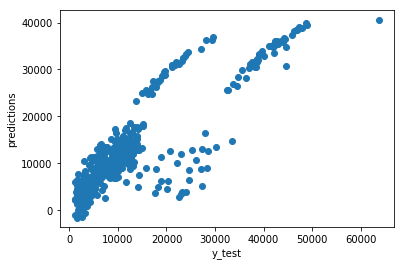

In [82]:
#plotting
plt.scatter(y_test, predictions2)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [73]:
d2 = {'Actual':y_test,'Predicted':predictions2}
df = pd.DataFrame(data=d2)
df.head(10)

,Actual,Predicted
764,9095.07,8960.0
887,5272.18,7168.0
890,29330.98,36352.0
1293,9301.89,9600.0
259,33750.29,26880.0
1312,4536.26,11392.0
899,2117.34,128.0
752,14210.54,17408.0
1286,3732.63,896.0
707,10264.44,11392.0


In [ ]:
#..................................

In [10]:
#Filter the categorical data from numerical ones in different DataFrame.
#Using method (.copy()), so that any changes made in new DataFrame dont get reflected in the orginal one

# categorical_features = x_data.select_dtypes(include=[object]).copy()

In [11]:
# categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [12]:
numerical_features= x_data.select_dtypes(['float', 'int']).copy()

In [13]:
numerical_features.head()

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0


In [14]:
#checking wether the dataframs contains null-values
# check the total number of the null-values in the dataframs

print(categorical_features.isnull().values.sum())
print(numerical_features.isnull().values.sum())
print(categorical_features.isnull().sum())
print(numerical_features.isnull().sum())

0
0
sex       0
smoker    0
region    0
dtype: int64
age         0
bmi         0
children    0
dtype: int64


In [15]:
# encoding the categorical-features to numerical quantities.
# one-hot coding meant to cconvert each category value into anew column and assign a 1or 0 value to the column, using(.get_dummies()) in pandas.
# the get_dummies() function named this way as it creates dummy variables between(1or0).
# get_dummies() take three important arguments:1)Dataframe 2)columns 3)prefix

In [16]:
categorical_features_onehot = categorical_features.copy()
categorical_features_onehot = pd.get_dummies(categorical_features_onehot, columns=['sex', 'smoker', 'region'], prefix=['sex-encoding','smoker-encoding','region-encoding'])

In [21]:
#categorical_features_onehot = pd.concat([categorical_features,categorical_features_onehot], axis=1)
categorical_features_onehot.head()

,sex,smoker,region,sex-encoding_female,sex-encoding_male,smoker-encoding_no,smoker-encoding_yes,region-encoding_northeast,region-encoding_northwest,region-encoding_southeast,region-encoding_southwest
0,female,yes,southwest,1,0,0,1,0,0,0,1
1,male,no,southeast,0,1,1,0,0,0,1,0
2,male,no,southeast,0,1,1,0,0,0,1,0
3,male,no,northwest,0,1,1,0,0,1,0,0
4,male,no,northwest,0,1,1,0,0,1,0,0


In [22]:
# #the one-hot encoding can be done as well in sklearn, via 'Label1Binarizer' and 'OneHotEncoder' 

# from sklearn.preprocessing import OneHotEncoder 
# from sklearn.preprocessing import LabelBinarizer

# categorical_features_onehot_sklearn = categorical_features.copy()
# lb = LabelBinarizer()
# lb_results1 = lb.fit_transform(categorical_features_onehot_sklearn['sex'])
# lb_results_df1 = pd.DataFrame(lb_results, columns=lb.classes_)
# print(lb_results_df1.head())

In [ ]:
# categorical_features_onehot_sklearn = categorical_features.copy()
# lb = LabelBinarizer()
# lb_results2 = lb.fit_transform(categorical_features_onehot_sklearn['smoker'])
# lb_results_df2 = pd.DataFrame(lb_results, columns=lb.classes_)
# print(lb_results_df2.head())

In [ ]:
# categorical_features_onehot_sklearn = categorical_features.copy()
# lb = LabelBinarizer()
# lb_results3 = lb.fit_transform(categorical_features_onehot_sklearn['region'])
# lb_results_df3 = pd.DataFrame(lb_results, columns=lb.classes_)
# print(lb_results_df3.head())

In [ ]:
# categorical_features_onehot_sklearn = pd.concat([categorical_features_onehot_sklearn, lb_results_df1, lb_results_df2, lb_results_df3])
# print (categorical_features_onehot_sklearn.head())

In [ ]:
#scaling the numerical-features: (MinMaxScaler, RobustScaler, StandardScaler, and Normalizer are scikit-learn methods).
#the feather scaling(scale=standardize=normalize) makes the features have similar scale and close to normally-distruted.

#scaling means to change the range (set at 0 to 1) of the values, the shape of the distrubtion does not change
#standarlize means changing the values so that the distribution standarddeviation from the mean equals one. It outputs something very close to a normal distribution
#why scaling: cause many machine learning algorithms perform better or converge faster when fetaures are on a relatively similar scale or close to the normally distributed.

In [24]:
# numerical_features_scaling.head()

In [ ]:
from sklearn import preprocessing
numerical_features_scaling = numerical_features.copy()

#create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

#scale numerical_features
scaled_numerical_features = minmax_scale.fit_transform(numerical_features_scaling)

#show features
scaled_numerical_features

In [ ]:
#chech the shape
scaled_numerical_features.shape

In [ ]:
#plot the distrubtion of the features that showed the similar distribution for the numerical features
plt.plot(scaled_numerical_features)
plt.show()

In [ ]:
scaled_numerical_features1 = pd.DataFrame(np.array(scaled_numerical_features))
scaled_numerical_features1.head()

In [ ]:
scaled_numerical_features1.columns = ['age', 'bml', 'children']
data = pd.concat([scaled_numerical_features1, categorical_features_onehot], axis=1)
data.head()

In [ ]:
x_data = data.drop(columns=['sex', 'region', 'smoker'])

In [ ]:
#Training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42) 

In [ ]:

X_test.shape

In [ ]:
X_train.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
X_train

In [ ]:
#set a model which is 'linear regression'
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()

#fit the model
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
#plotting
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [ ]:
print (model.score(X_test, y_test))

In [ ]:
len(y_test),len(predictions)

In [ ]:
y_test = y_test.reset_index()
y_test = y_test.drop(columns='index')

In [ ]:
d = {'Actual':y_test,'Predicted':predictions}
df = pd.DataFrame(data=d)
df

In [ ]:
y_test

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predictions)
print(np.sqrt(MSE))

In [ ]:
plt.plot(y_test)
plt.show()